In [1]:
# Work with Data - the main Python libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp

# Visualization
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, ShuffleSplit, GridSearchCV

# Modelling - sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# Modeling - NN models
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers
from keras.wrappers.scikit_learn import KerasRegressor
from keras.callbacks import ReduceLROnPlateau
#import tensorflow as tf

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

import warnings
warnings.simplefilter('ignore')

In [2]:
# Download training data
train = pd.read_csv('../input/ammonium-prediction-in-river-water/train.csv')

In [3]:
# Display the first 5 rows of the training dataframe.
train.head()

,Id,target,1,2,3,4,5,6,7
0,0,1.10,0.69,1.04,NaN,NaN,NaN,NaN,NaN
1,3,0.41,0.71,0.72,NaN,NaN,NaN,NaN,NaN
2,4,1.70,2.21,2.21,NaN,NaN,NaN,NaN,NaN
3,5,0.62,0.60,0.68,NaN,NaN,NaN,NaN,NaN
4,6,0.60,0.60,0.90,NaN,NaN,NaN,NaN,NaN


In [4]:
# Information for training data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      147 non-null    int64  
 1   target  147 non-null    float64
 2   1       145 non-null    float64
 3   2       145 non-null    float64
 4   3       32 non-null     float64
 5   4       31 non-null     float64
 6   5       33 non-null     float64
 7   6       37 non-null     float64
 8   7       37 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 10.5 KB


In [5]:
# Download test data
test = pd.read_csv('../input/ammonium-prediction-in-river-water/test.csv')

In [6]:
# Display the 7 last rows of the training dataframe
test.tail()

,Id,1,2,3,4,5,6,7
58,206,0.37,0.26,0.71,18.28,24.99,0.57,1.57
59,209,0.39,0.32,NaN,NaN,NaN,NaN,NaN
60,210,0.43,0.21,NaN,NaN,NaN,NaN,NaN
61,215,0.36,0.42,NaN,NaN,NaN,NaN,NaN
62,216,0.35,0.30,NaN,NaN,NaN,NaN,NaN


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      63 non-null     int64  
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       15 non-null     float64
 4   4       15 non-null     float64
 5   5       16 non-null     float64
 6   6       14 non-null     float64
 7   7       14 non-null     float64
dtypes: float64(7), int64(1)
memory usage: 4.1 KB


In [8]:
# Select the stations with the most data in training dataset
train = train.drop(['Id','3','4','5','6','7'], axis = 1)
train = train.dropna().reset_index(drop=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  144 non-null    float64
 1   1       144 non-null    float64
 2   2       144 non-null    float64
dtypes: float64(3)
memory usage: 3.5 KB


In [9]:
# Display the statistics for training data
train.describe()

,target,1,2
count,144.000000,144.000000,144.000000
mean,0.580486,0.588264,0.664653
std,0.434269,0.463758,0.592069
min,0.040000,0.040000,0.020000
25%,0.250000,0.227500,0.220000
50%,0.425000,0.415000,0.455000
75%,0.827500,0.802500,0.920000
max,1.930000,2.400000,3.600000


In [10]:
# Selecting a target featute and removing it from training dataset
target = train.pop('target')

In [11]:
# Select the stations with the most data in test dataset
test = test.drop(['Id','3','4','5','6','7'], axis = 1)
test = test.dropna().reset_index(drop=True)

In [12]:
# Display basic information about the test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       63 non-null     float64
 1   2       63 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [13]:
# Training data splitting to new training (part of the all training) and validation data
train_all = train.copy()
target_all = target.copy()
train, valid, target_train, target_valid = train_test_split(train_all, target_all, test_size=0.2, random_state=0)

In [14]:
train

,1,2
18,1.10,0.70
71,0.27,0.26
27,0.41,0.47
141,2.40,3.60
2,2.21,2.21
...,...,...
9,0.39,0.41
103,0.12,0.12
67,0.70,0.82
117,0.20,0.16


In [15]:
# Display information about new training data
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 18 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       115 non-null    float64
 1   2       115 non-null    float64
dtypes: float64(2)
memory usage: 2.7 KB


In [16]:
# Display information about validation data
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 7 to 101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       29 non-null     float64
 1   2       29 non-null     float64
dtypes: float64(2)
memory usage: 696.0 bytes


In [17]:
def acc(y_true, y_pred):
    # Calculation accuracy of prediction
    return r2_score(y_true, y_pred)

In [18]:
# Creation the dataframe with the resulting score of all models
result = pd.DataFrame({'model' : ['NN Regressor', 'NN Regressor with Dropout', 'MLP Regressor'], 
                       'train_score': 0, 'train_mse': 0, 'valid_score': 0, 'valid_mse': 0})
result

,model,train_score,train_mse,valid_score,valid_mse
0,NN Regressor,0,0,0,0
1,NN Regressor with Dropout,0,0,0,0
2,MLP Regressor,0,0,0,0


In [19]:
batch_size_num = 22
#batch_size_num = int(len(train)/5)
#batch_size_num

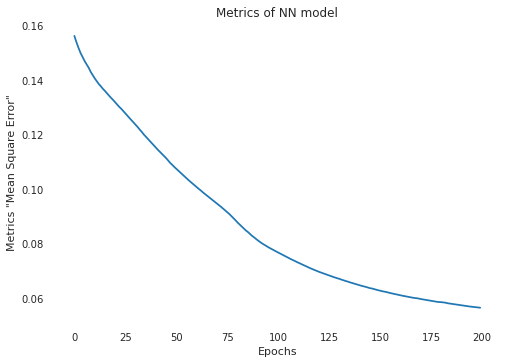

Accuracy of NN model model training is 0.68
CPU times: user 6.15 s, sys: 405 ms, total: 6.55 s
Wall time: 6 s


In [20]:
%%time
def build_nn():

    # Initializing the NN with 3 layers including 2 hidden layers
    model = Sequential()

    # The first hidden layer of the NN with input data
    model.add(Dense(units=4, activation='relu', input_shape=(len(train.columns),)))
    
    # The second hidden layer of the NN
    model.add(Dense(units=3, activation='relu'))
    
    # The output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compiling the NN
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])

    learning_rate_reduction = ReduceLROnPlateau(monitor='val_mse', 
                                    patience=5, 
                                    verbose=1, 
                                    factor=0.5, 
                                    min_lr=0.0001)
    return model

nn_model = build_nn()
nn_model.fit(train, target_train, batch_size=batch_size_num, epochs=200, validation_data=(valid, target_valid), verbose=0)

# Drawing metrics plot
plt.plot(nn_model.history.history['mse'])
plt.title('Metrics of NN model')
plt.xlabel('Epochs')
plt.ylabel('Metrics "Mean Square Error"') 
plt.show()

# Prediction for training data
y_train_nn = nn_model.predict(train)

# Accuracy of model
acc_pred = round(acc(target_train, y_train_nn), 2)
print(f'Accuracy of NN model model training is {acc_pred}')

# Save to result DataFrame
result.loc[result['model'] == 'NN Regressor', 'train_score'] = acc_pred
result.loc[result['model'] == 'NN Regressor', 'train_mse'] = mse(target_train, y_train_nn)

In [21]:
# NN structure and parameters
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [22]:
# Print rounded acc_pred to 2 decimal values after the text
y_val_nn = nn_model.predict(valid)
acc_pred_valid = round(acc(target_valid, y_val_nn),2)
result.loc[result['model'] == 'NN Regressor', 'valid_score'] = acc_pred_valid
result.loc[result['model'] == 'NN Regressor', 'valid_mse'] = round(mse(target_valid, y_val_nn),2)
print(f'Accuracy of NN Regressor model prediction for valid dataset is {acc_pred_valid}')

Accuracy of NN Regressor model prediction for valid dataset is 0.64


Epoch 1/400
6/6 - 0s - loss: 0.1759 - mse: 0.1759 - val_loss: 0.2553 - val_mse: 0.2553
Epoch 2/400
6/6 - 0s - loss: 0.1743 - mse: 0.1743 - val_loss: 0.2546 - val_mse: 0.2546
Epoch 3/400
6/6 - 0s - loss: 0.1745 - mse: 0.1745 - val_loss: 0.2538 - val_mse: 0.2538
Epoch 4/400
6/6 - 0s - loss: 0.1746 - mse: 0.1746 - val_loss: 0.2529 - val_mse: 0.2529
Epoch 5/400
6/6 - 0s - loss: 0.1725 - mse: 0.1725 - val_loss: 0.2524 - val_mse: 0.2524
Epoch 6/400
6/6 - 0s - loss: 0.1726 - mse: 0.1726 - val_loss: 0.2517 - val_mse: 0.2517
Epoch 7/400
6/6 - 0s - loss: 0.1736 - mse: 0.1736 - val_loss: 0.2509 - val_mse: 0.2509
Epoch 8/400
6/6 - 0s - loss: 0.1725 - mse: 0.1725 - val_loss: 0.2499 - val_mse: 0.2499
Epoch 9/400
6/6 - 0s - loss: 0.1711 - mse: 0.1711 - val_loss: 0.2490 - val_mse: 0.2490
Epoch 10/400
6/6 - 0s - loss: 0.1713 - mse: 0.1713 - val_loss: 0.2481 - val_mse: 0.2481
Epoch 11/400
6/6 - 0s - loss: 0.1747 - mse: 0.1747 - val_loss: 0.2474 - val_mse: 0.2474
Epoch 12/400
6/6 - 0s - loss: 0.1775 - ms

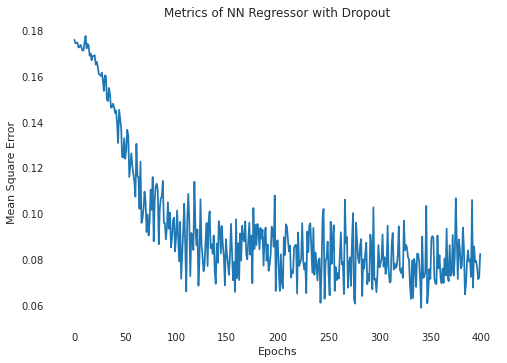

Accuracy of NN Regressor with Dropout training is 0.69
CPU times: user 13.2 s, sys: 942 ms, total: 14.1 s
Wall time: 12 s


In [23]:
%%time
def build_nn2():

    # Initializing the NN with 3 layers including 2 hidden layers and Dropout
    model = Sequential()

    # The first hidden layer of the NN with input data
    model.add(Dense(units=4, activation='relu', input_shape=(len(train.columns),)))
    
    # Dropout
    model.add(Dropout(0.2))
    
    # The second hidden layer of the NN
    model.add(Dense(units=3, activation='relu'))
    
    # The output layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compiling the NN
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_mse', 
                                    patience=6, 
                                    verbose=1, 
                                    factor=0.05, 
                                    min_lr=0.0001)
    
    return model

nn_model2 = build_nn2()
nn_model2.fit(train, target_train, batch_size=batch_size_num, epochs=400, validation_data=(valid, target_valid), verbose=2)

# Drawing metrics plot
plt.plot(nn_model2.history.history['mse'])
plt.title('Metrics of NN Regressor with Dropout')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error') 
plt.show()

# Prediction for training data
y_train_nn2 = nn_model2.predict(train)

# Accuracy of model
acc_pred = round(acc(target_train, y_train_nn2), 2)
print(f'Accuracy of NN Regressor with Dropout training is {acc_pred}')

# Save to result DataFrame
result.loc[result['model'] == 'NN Regressor with Dropout', 'train_score'] = acc_pred
result.loc[result['model'] == 'NN Regressor with Dropout', 'train_mse'] = round(mse(target_train, y_train_nn),2)

In [24]:
# Print rounded acc_pred to 2 decimal values after the text
y_val_nn2 = nn_model2.predict(valid)
acc_pred_valid = round(acc(target_valid, y_val_nn2),2)
result.loc[result['model'] == 'NN Regressor with Dropout', 'valid_score'] = acc_pred_valid
result.loc[result['model'] == 'NN Regressor with Dropout', 'valid_mse'] = mse(target_valid, y_val_nn2)
print(f'Accuracy of NN Regressor with Dropout prediction for valid dataset is {acc_pred_valid}')

Accuracy of NN Regressor with Dropout prediction for valid dataset is 0.63


In [25]:
%%time
# MLPRegressor
mlp = MLPRegressor()
param_grid = {'hidden_layer_sizes': [i for i in range(2,10)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [100]
              }

# Training model
mlp_CV = GridSearchCV(mlp, param_grid=param_grid, cv=5, verbose=False)
mlp_CV.fit(train, target_train)
print(mlp_CV.best_params_)

# Prediction for training data
y_train_mlp = mlp_CV.predict(train)

# Accuracy of model
acc_pred = round(acc(target_train, y_train_mlp), 2)
print(f'Accuracy of MLP Regressor model training is {acc_pred}')

# Save to result dataframe
result.loc[result['model'] == 'MLP Regressor', 'train_score'] = acc_pred
result.loc[result['model'] == 'MLP Regressor', 'train_mse'] = mse(target_train, y_train_nn)

{'hidden_layer_sizes': 8, 'learning_rate': 'adaptive', 'max_iter': 100, 'solver': 'sgd'}
Accuracy of MLP Regressor model training is 0.61
CPU times: user 2.22 s, sys: 0 ns, total: 2.22 s
Wall time: 2.22 s


In [26]:
# Print rounded acc_pred to 2 decimal values after the text
y_val_mlp = mlp_CV.predict(valid)
acc_pred_valid = round(acc(target_valid, y_val_mlp),2)
result.loc[result['model'] == 'MLP Regressor', 'valid_score'] = acc_pred_valid
result.loc[result['model'] == 'MLP Regressor', 'valid_mse'] = round(mse(target_valid, y_val_mlp),2)
print(f'Accuracy of MLP Regressor model prediction for valid dataset is {acc_pred_valid}')

Accuracy of MLP Regressor model prediction for valid dataset is 0.6


In [27]:
# Prediction of target for test data for all models
y_test_nn = nn_model.predict(test)
y_test_nn2 = nn_model2.predict(test)
y_test_mlp = mlp_CV.predict(test)

In [28]:
def plot_prediction(target, y_nn, y_nn2, y_mlp, data_name, MAV=0.5):
    # Building plot with target, Maximum allowable value (MAV) and 
    # prediction for the data_name (training, validation or test) data by 3 models
    
    x = np.arange(len(y_nn))
    plt.figure(figsize=(16,10))
    if target is not None:
        plt.scatter(x, target, label = "Target data", color = 'g')
    plt.scatter(x, y_nn, label = "NN prediction", color = 'b')
    plt.scatter(x, y_nn2, label = "NN with Dropout", color = 'm')
    plt.scatter(x, y_mlp, label = "MLP prediction", color = 'y')
    plt.plot(x, np.full(len(y_nn), MAV), label = "Maximum allowable value", color = 'r')
    plt.title(f'Prediction for the {data_name} data')
    plt.legend(loc='best')
    plt.grid(True)

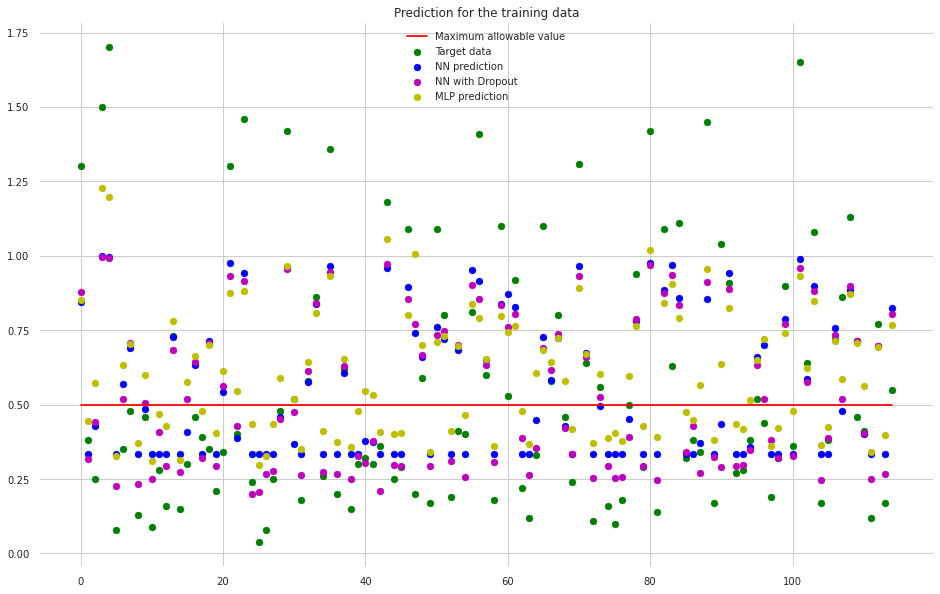

In [29]:
plot_prediction(target_train, y_train_nn, y_train_nn2, y_train_mlp, 'training')

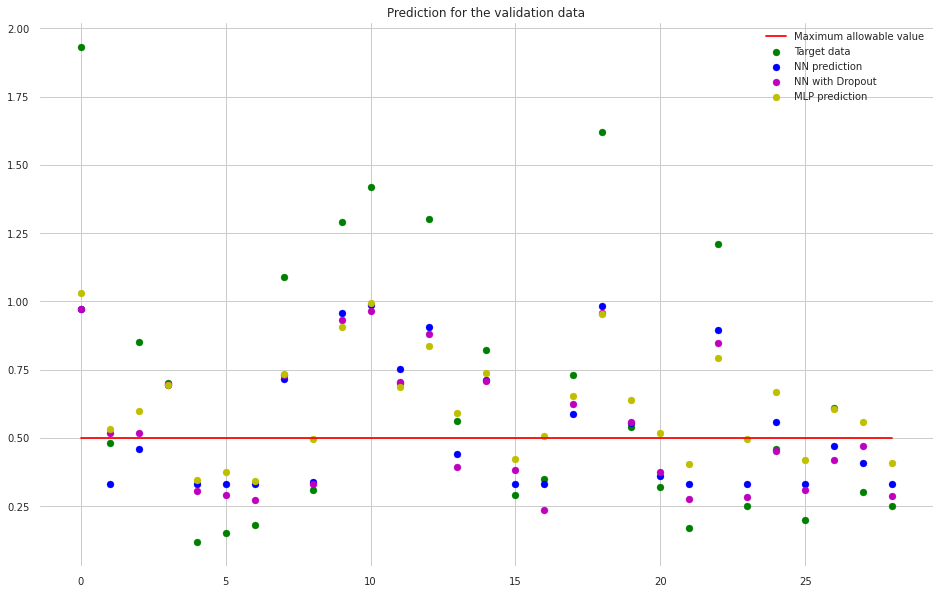

In [30]:
plot_prediction(target_valid, y_val_nn, y_val_nn2, y_val_mlp, 'validation')

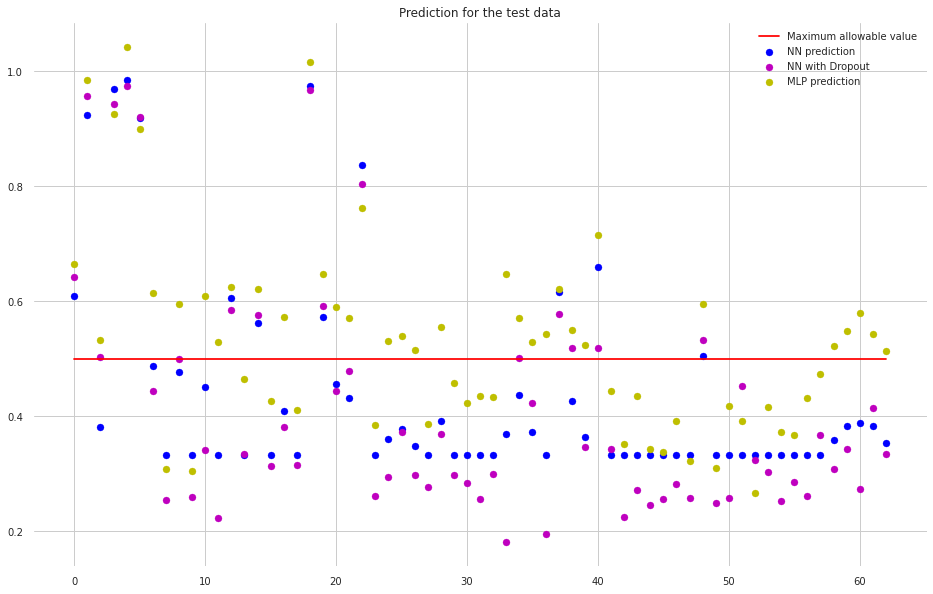

In [31]:
plot_prediction(None, y_test_nn, y_test_nn2, y_test_mlp, 'test')

In [32]:
# Display results of modeling
result.sort_values(by=['valid_score', 'train_score'], ascending=False)

,model,train_score,train_mse,valid_score,valid_mse
0,NN Regressor,0.68,0.056262,0.64,0.080000
1,NN Regressor with Dropout,0.69,0.060000,0.63,0.085263
2,MLP Regressor,0.61,0.056262,0.60,0.090000


In [33]:
# Select models with minimal overfitting
result_best = result[(result['train_score'] - result['valid_score']).abs() < 5]
result_best.sort_values(by=['valid_score', 'train_score'], ascending=False)

,model,train_score,train_mse,valid_score,valid_mse
0,NN Regressor,0.68,0.056262,0.64,0.080000
1,NN Regressor with Dropout,0.69,0.060000,0.63,0.085263
2,MLP Regressor,0.61,0.056262,0.60,0.090000


In [34]:
# Select the best model
result_best.nlargest(1, 'valid_score')

,model,train_score,train_mse,valid_score,valid_mse
0,NN Regressor,0.68,0.056262,0.64,0.08


In [35]:
# Find a name of the best model (with maximal valid score)
best_model_name = result_best.loc[result_best['valid_score'].idxmax(result_best['valid_score'].max()), 'model']

In [36]:
print(f'The best model is "{best_model_name}"')

The best model is "NN Regressor"
